# sequencing_tools.viz_tools #


## Upset graph ##

In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from sequencing_tools.viz_tools import plot_upset
import numpy as np
from itertools import combinations
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's simulate a dataset:

In [18]:
var = 'ABCD'
encoder = {e:i for i, e in enumerate(var)}
matrix = []
for comb1, comb2 in combinations(var, 2):
    row = np.zeros(len(var))
    row[encoder[comb1]] += 1
    row[encoder[comb2]] += 1
    matrix.append(row)
upset_df = pd.DataFrame(matrix,columns=list(var)) \
    .assign(count = lambda d: np.random.random_integers(0,high = 10,size=d.shape[0]))\
    .reset_index()
upset_df

/home/wckdouglas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  # Remove the CWD from sys.path while we load stuff.


,index,A,B,C,D,count
0,0,1.0,1.0,0.0,0.0,5
1,1,1.0,0.0,1.0,0.0,10
2,2,1.0,0.0,0.0,1.0,7
3,3,0.0,1.0,1.0,0.0,8
4,4,0.0,1.0,0.0,1.0,2
5,5,0.0,0.0,1.0,1.0,6


The ```plot_upset``` function requires a input of ```plt.figure``` as placeholder and a pandas dataframe as upset_df

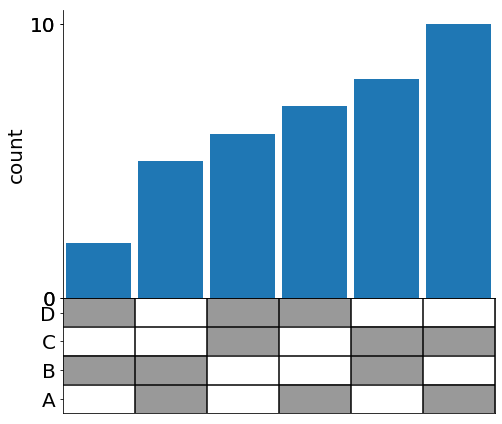

In [19]:
fig = plt.figure()
plot_upset(fig, upset_df.sort_values('count'), ylab='count', matrix_to_plot_ratio=0.4, fontsize=20)

## Correlation matrix scatter plot ##

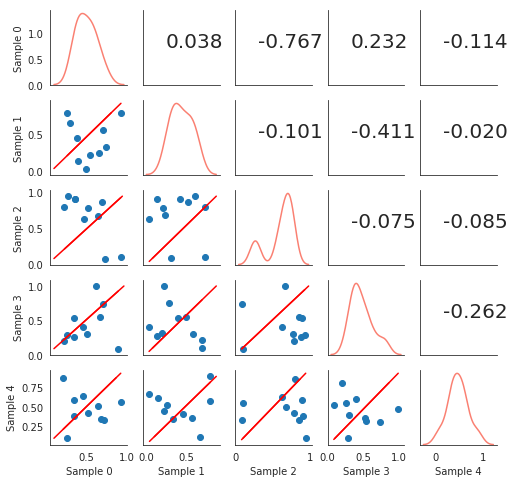

In [28]:
from sequencing_tools.viz_tools import cor_plot
import seaborn as sns
sns.set_style('white')

n_sample = 5
d = np.random.rand(10,n_sample)
d = pd.DataFrame(d, columns=['Sample %i' %i for i in range(n_sample)])
fig = plt.figure(figsize=(8,8))
cor_plot(d, fig)